In [1]:
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

2025-04-04 23:03:44,122 INFO numexpr.utils NumExpr defaulting to 8 threads.


In [2]:
dune_api_key = '7WfY9xk94nfG1mQQ3r8iLolCALi5hSgx' # input your API key, to create one follow guide here https://docs.dune.com/api-reference/overview/authentication


In [3]:
query_id = 4915424

In [4]:
dune = DuneClient(
    api_key=dune_api_key,
    base_url="https://api.dune.com",
    request_timeout=(300) )

In [10]:
query_result = dune.get_latest_result_dataframe(query=query_id)

HTTPError: 402 Client Error: Payment Required for url: https://api.dune.com/api/v1/query/4915424/results/csv?allow_partial_results=true&limit=32000

In [ ]:
df = query_result.copy()

In [8]:
df

NameError: name 'df' is not defined

In [6]:
# Chart 1: Daily Volume per DEX (USD)
df['project'].value_counts().head(30)

NameError: name 'df' is not defined

In [55]:
import sys
print(sys.executable)

/Users/bahareh/opt/anaconda3/bin/python


In [8]:
from flipside import Flipside

flipside = Flipside("bfb1c2a7-30de-46af-a084-5b8d9511280c", "https://api-v2.flipsidecrypto.xyz")

sql = """
select
BLOCK_TIMESTAMP as trade_date,
PLATFORM,
count(distinct ORIGIN_FROM_ADDRESS) as active_users,
sum(AMOUNT_IN_USD) as usd
from ethereum.defi.ez_dex_swaps
where BLOCK_TIMESTAMP >= CURRENT_DATE - INTERVAL '30 days'
group by 1,2;
"""

# Run the query against Flipside's query engine and await the results
query_result_set = flipside.query(sql)

In [9]:
import pandas as pd


df = pd.DataFrame(query_result_set.records)
df.head()

,trade_date,platform,active_users,usd,__row_index
0,2025-03-27T15:55:47.000Z,uniswap-v3,4,415214.98,0
1,2025-03-27T19:36:35.000Z,uniswap-v2,7,2700.88,1
2,2025-03-27T18:10:23.000Z,uniswap-v2,11,7476.55,2
3,2025-03-14T02:12:47.000Z,uniswap-v2,7,3618.73,3
4,2025-03-27T15:50:59.000Z,curve,1,179.70,4


In [10]:
df.shape

(100000, 5)

In [13]:
df["trade_date"] = pd.to_datetime(df["trade_date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   trade_date    100000 non-null  datetime64[ns, UTC]
 1   platform      100000 non-null  object             
 2   active_users  100000 non-null  int64              
 3   usd           99706 non-null   float64            
 4   __row_index   100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [12]:
df['platform'].value_counts()

platform
uniswap-v3        40893
uniswap-v2        38857
curve              6138
sushiswap          4545
pancakeswap-v3     4364
balancer           2274
shibaswap           889
pancakeswap-v2      521
dodo-v2             507
fraxswap            298
hashflow-v3         257
verse               248
kyberswap-v1        106
dodo-v1              88
woofi                 9
kyberswap-v2          3
maverick              2
trader-joe-v2         1
Name: count, dtype: int64

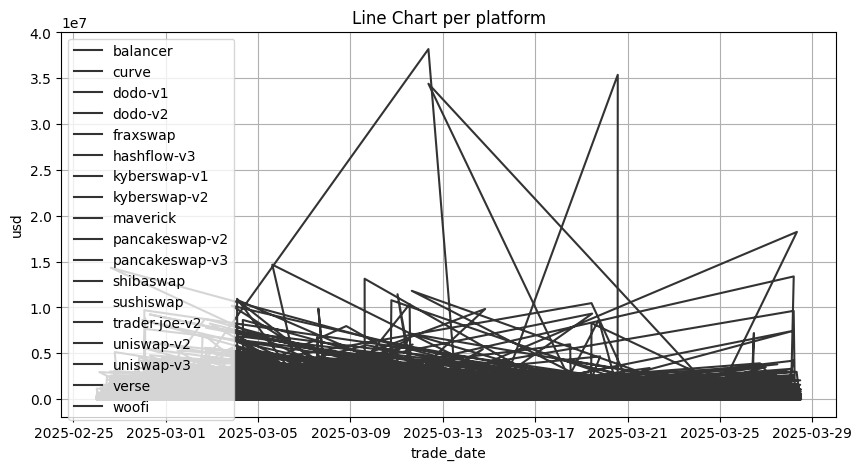

In [22]:

# Define custom colors
custom_colors = {
    "A": "#1f77b4",  # blue
    "B": "#ff7f0e"   # orange
}

plt.figure(figsize=(10, 5))

# Plot each group separately
for group_name, group_df in df.groupby("platform"):
    plt.plot(
        group_df["trade_date"],
        group_df["usd"],
        label= group_name,
        color=custom_colors.get(group_name, "#333333")
    )

plt.xlabel("trade_date")
plt.ylabel("usd")
plt.title("Line Chart per platform")
plt.legend()
plt.grid(True)
plt.show()